# 🌍 Analysis of the Top 20 Cities Worldwide by Quality of Life in 2025

## 📖 Introduction

In this mini-project, I set out to analyze the quality of life in major cities around the world for the year **2025**.

I selected the **Top 20 cities** to provide broader geographic diversity and avoid repetition caused by the dominance of cities from a single country at the top of the ranking.

Initially, I planned to use the `requests` library to retrieve data from the **Numbeo** website, but the required table couldn't be loaded directly. Therefore, I manually saved the HTML page and used it as the data source. This approach is convenient for one-time analysis and ensures stability and reproducibility of results. The project can easily be reproduced by simply adding the HTML file.

Using **BeautifulSoup**, I extracted a table containing a full set of quality of life indicators across cities (including quality of life, safety, healthcare, cost of living, climate, and more).  
For analysis and visualization, I focused on three key indexes: **Quality of Life**, **Safety**, and **Healthcare**.  
The charts, created with **Matplotlib**, display the **Top 20 cities** with the highest values in each of these indexes for 2025.


### 🎯 ***Project Goal***

To extract data on the quality of life in cities around the world for the year **2025** from an HTML document using **web scraping**, convert it into a convenient format using **pandas**, and visualize the **Top 20 cities** based on the following key indexes:
- **Quality of Life Index**  
- **Safety Index**  
- **Health Care Index**

📌 These three indexes were chosen because they represent the most essential aspects of everyday urban life —  **overall well-being, personal safety, and access to healthcare**. Together, they provide a well-rounded picture of the living conditions in each city.

This project serves as practical training in **web scraping**, **data processing**, and **data visualization using Python**.


## 🧰 Libraries Used

***BeautifulSoup*** — a library for parsing HTML and extracting the necessary information from the structure of a web page. It is easy to use and ideal for working with both local and downloaded HTML files.

***pandas*** — a powerful tool for working with tabular data. It allows you to conveniently store, filter, and analyze data using DataFrames.

***Matplotlib*** — a data visualization library. It makes it easy to create charts, plots, and visually represent analytical results.


# 🔗 Data Source

This project uses a table from the **Numbeo** website that provides information on the quality of life in cities around the world for the year **2025**.

Data source: 🌐 [https://www.numbeo.com/quality-of-life/rankings.jsp?title=2025](https://www.numbeo.com/quality-of-life/rankings.jsp?title=2025)

Since the table could not be retrieved directly using the `requests` library, the HTML page was saved manually.  
The table containing the required data was located under the tag with `id="t2"` and included the following columns:
- Rank  
- City  
- Quality of Life Index  
- Safety Index  
- Health Care Index  
- Cost of Living  
- Property Price to Income  
- Traffic  
- Pollution  
- Climate

⚠️ **Note:** When using data from websites, it is important to follow the ***Terms of Use***. Numbeo allows moderate use of its data for personal and educational purposes.


In [6]:
# URL of the page containing the table (for reference)
url2025 = "https://www.numbeo.com/quality-of-life/rankings.jsp?title=2025"

### 1. Installing the library:


In [8]:
!pip install beautifulsoup4 pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2. Importing libraries


In [9]:
# import requests  # Used during initial attempts to scrape the site directly

# Library for parsing HTML documents
from bs4 import BeautifulSoup

# Library for working with tables and data analysis
import pandas as pd

# Library for data visualization
import matplotlib.pyplot as plt


### 3. Loading and parsing the HTML document


In [10]:
# Load the local HTML file
with open("data/quality_of_life_2025.html", "r", encoding="utf-8") as f:
    html = f.read()

# Create a BeautifulSoup object to parse the HTML using the built-in "html.parser"
soup = BeautifulSoup(html, "html.parser")

# Find the desired table by its id
table = soup.find("table", {"id": "t2"})

# Display the first 500 characters of the table (to check its structure)
print(table.prettify()[:500])


<table aria-describedby="t2_info" class="stripe row-border order-column compact dataTable no-footer" id="t2" role="grid">
 <thead>
  <tr role="row">
   <th aria-label="Rank" class="sorting_disabled ui-state-default" colspan="1" rowspan="1" style="width: 46.4762px;">
    <div class="DataTables_sort_wrapper">
     <div style="font-size: 80%; vertical-align: middle;">
      Rank
     </div>
     <span class="DataTables_sort_icon">
     </span>
    </div>
   </th>
   <th aria-controls="t2" aria-labe


### 4. Converting the HTML Table to a DataFrame

In this step, the table headers and rows are manually extracted from the HTML page using **BeautifulSoup**. Then, the data is converted into a tabular format using **pandas**.

📌 Although the built-in method ***pandas.read_html()*** could be used for such tasks, I chose to do it manually to better understand the structure of the HTML document and to strengthen my web scraping skills.  
This approach provides more control and is especially useful for learning the fundamentals of web scraping.


In [11]:
# Get the list of table headers (column names) —
# iterate over all <th> tags and extract text, stripping unnecessary spaces
headers = [th.get_text(strip=True) for th in table.find_all("th")]

# Create an empty list to store the table rows
rows = []

# Iterate over all <tr> rows, starting from the second one — skip the first as it contains headers
for tr in table.find_all("tr")[1:]:
    
    # Extract all <td> cells and get their text content without leading/trailing spaces
    cols = [td.get_text(strip=True) for td in tr.find_all("td")]
    
    # Add the row to the list if it's not empty
    if cols:
        rows.append(cols)

# Convert the data into a pandas DataFrame
df_2025 = pd.DataFrame(rows, columns=headers)

# Display the first 20 rows of the table
df_2025.head(20)


,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,"The Hague (Den Haag), Netherlands",229.0,151.8,79.5,80.7,58.3,5.7,21.0,17.9,90.6
1,2,"Groningen, Netherlands",225.9,153.5,78.1,76.4,54.5,5.0,20.1,18.8,83.5
2,3,"Luxembourg, Luxembourg",219.9,174.4,71.3,76.3,66.0,8.8,27.5,21.6,82.6
3,4,"Eindhoven, Netherlands",218.3,140.6,78.4,79.0,59.9,6.4,24.0,19.2,85.4
4,5,"Basel, Switzerland",217.0,182.4,72.9,71.6,98.0,8.5,27.6,24.9,82.8
5,6,"Bern, Switzerland",213.6,164.3,78.4,74.3,95.0,10.5,30.1,16.9,76.0
6,7,"Utrecht, Netherlands",213.5,139.3,74.2,80.6,60.2,7.4,23.5,23.2,87.2
7,8,"Rotterdam, Netherlands",210.0,130.2,71.6,80.7,61.5,6.7,22.4,23.2,87.9
8,9,"Lausanne, Switzerland",206.1,161.8,72.8,73.5,100.9,11.3,27.3,20.7,73.3
9,10,"Copenhagen, Denmark",204.2,130.0,74.2,77.0,71.3,8.4,27.8,21.3,83.7


### 5. Checking for Missing Values

Before starting the analysis, it's important to ensure that there are no missing values in the dataset — this helps prevent errors during processing and visualization.


In [12]:
# Check for missing values in the table
df_2025.isnull().sum()

Rank                              0
City                              0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Cost of Living Index              0
Property Price to Income Ratio    0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
dtype: int64

***Conclusion:*** There are no missing values in the table — no cleaning is required.


### 6. Saving the Data to CSV

After extracting and processing the data, it's convenient to save the table in CSV format. This allows for future reuse or easy sharing of the dataset.


In [13]:
# Save the table to a CSV file without indexes
df_2025.to_csv("output/quality_of_life_2025.csv", index=False)

### 7. 📊 Data Visualization (and Saving the Chart)

In this section, we visualize the cities with the highest index values in the following categories:
- **Quality of Life Index**
- **Safety Index**
- **Health Care Index**

To do this, we will create three horizontal bar charts using the **matplotlib** library.  
Each chart displays the **Top 20 cities** based on the corresponding index, with values labeled directly on the bars.  
This makes it easy to quickly identify which cities lead in each category.

The charts will also be saved in both `.png` and `.svg` formats, making them convenient to include in reports or presentations.


Before creating the visualizations, let's display the first 5 rows from each top-ranked group — this will help us better understand which cities are leading in each index: Quality of Life, Safety, and Health Care.


In [16]:
# Convert the relevant columns to numeric types (in case of parsing issues)
df_2025["Quality of Life Index"] = df_2025["Quality of Life Index"].astype(float)
df_2025["Safety Index"] = df_2025["Safety Index"].astype(float)
df_2025["Health Care Index"] = df_2025["Health Care Index"].astype(float)

# Sort the data by each index and extract the TOP-20 cities
top_quality = df_2025.sort_values(by="Quality of Life Index", ascending=False).head(20)
top_safety = df_2025.sort_values(by="Safety Index", ascending=False).head(20)
top_health = df_2025.sort_values(by="Health Care Index", ascending=False).head(20)

# Display the TOP-5 cities for each index as a preview
print("\n Top-5 cities by Quality of Life Index:")
display(top_quality[["City", "Quality of Life Index"]].head(5))

print("\n Top-5 cities by Safety Index:")
display(top_safety[["City", "Safety Index"]].head(5))

print("\n Top-5 cities by Health Care Index:")
display(top_health[["City", "Health Care Index"]].head(5))


 Top-5 cities by Quality of Life Index:


,City,Quality of Life Index
0,"The Hague (Den Haag), Netherlands",229.0
1,"Groningen, Netherlands",225.9
2,"Luxembourg, Luxembourg",219.9
3,"Eindhoven, Netherlands",218.3
4,"Basel, Switzerland",217.0



 Top-5 cities by Safety Index:


,City,Safety Index
25,"Abu Dhabi, United Arab Emirates",88.4
76,"Doha, Qatar",84.1
143,"Sharjah, United Arab Emirates",83.8
85,"Dubai, United Arab Emirates",83.8
126,"Taipei, Taiwan",83.8



 Top-5 cities by Health Care Index:


,City,Health Care Index
126,"Taipei, Taiwan",86.7
163,"Chiang Mai, Thailand",85.0
67,"Toulouse, France",84.0
153,"Seoul, South Korea",83.0
0,"The Hague (Den Haag), Netherlands",80.7


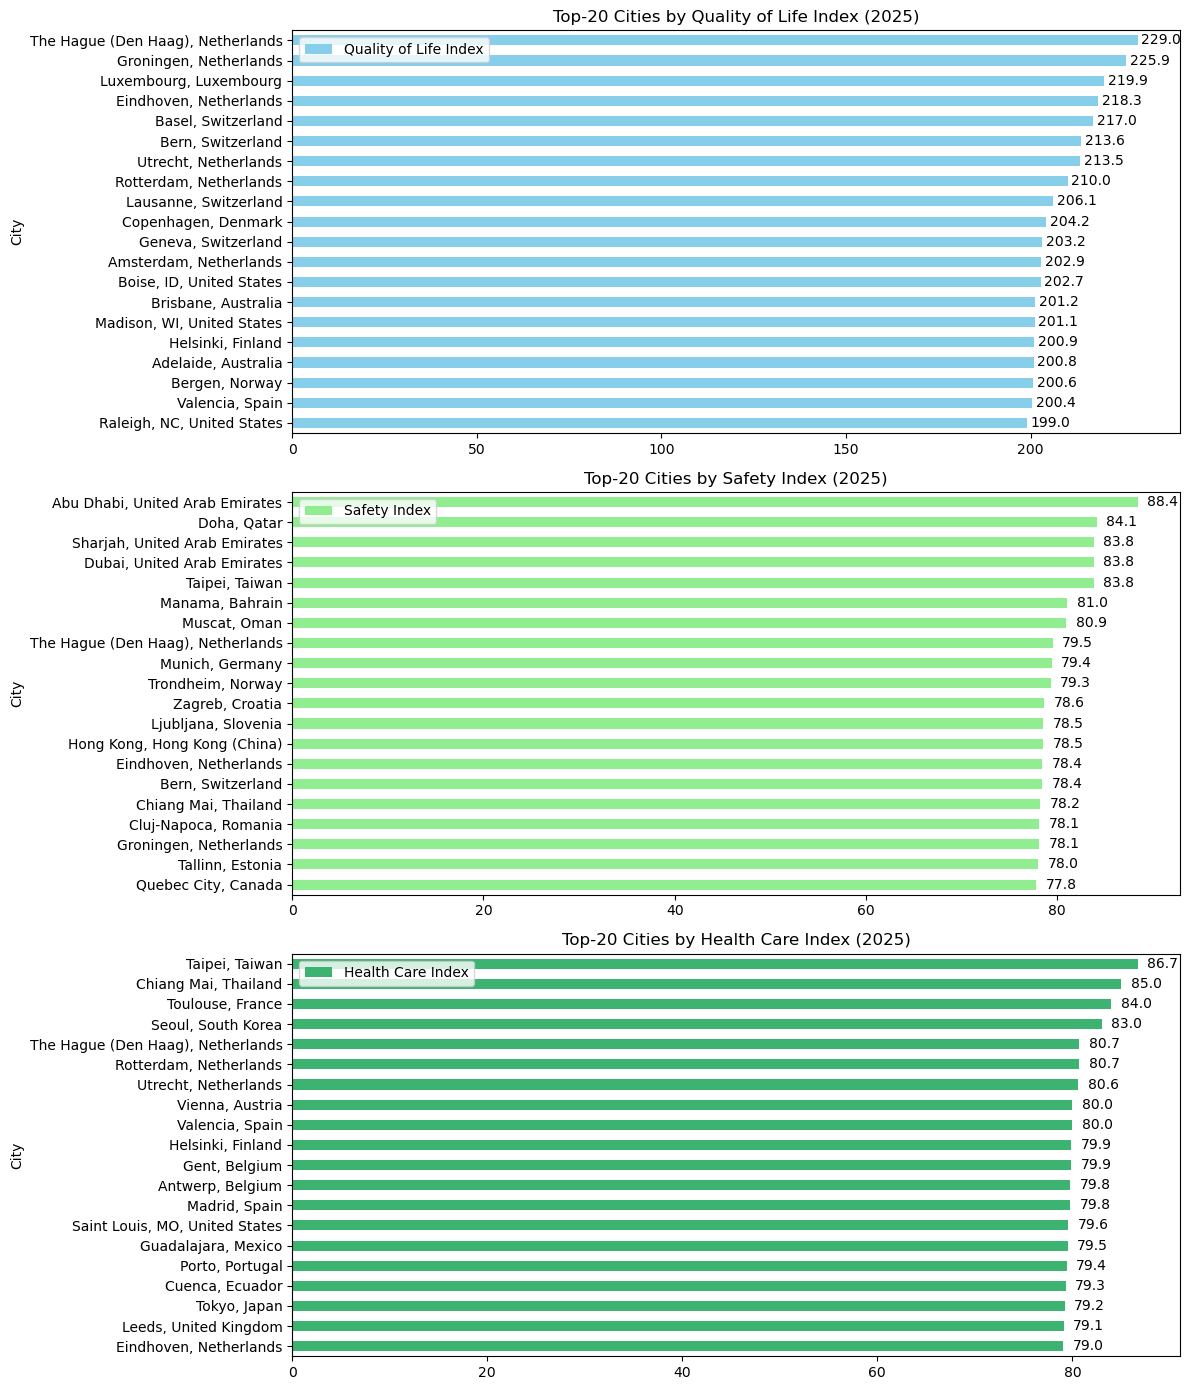

In [15]:
# Create a function for plotting horizontal bar charts

def plot_horizontal_bar(ax, data, x_col, y_col, color, title):
    """
    Displays a horizontal bar chart with value labels.

    :param ax: the Axes object to draw the chart on
    :param data: DataFrame containing the data to visualize
    :param x_col: column name for the Y-axis (usually city names — "City")
    :param y_col: column name for the X-axis (e.g., "Quality of Life Index")
    :param color: color of the bars
    :param title: chart title
    """
    # Plot a horizontal bar chart on the given axis
    data.plot(
        kind="barh",      # Chart type — horizontal bars
        x=x_col,          # City names on the Y-axis
        y=y_col,          # Index values on the X-axis
        ax=ax,            # Axis to draw on
        color=color,      # Bar color
        title=title       # Chart title
    )

    # Invert the Y-axis so the highest values appear at the top
    ax.invert_yaxis()

    # Add value labels next to each bar
    for i, v in enumerate(data[y_col]):
        ax.text(v + 1, i, f"{v:.1f}", va="center")  # v + 1 shifts the label slightly to the right

# === Create a figure with 3 subplots (1 column, 3 rows) ===
fig, axs = plt.subplots(3, 1, figsize=(12, 14))  # 3 rows, 1 column; figure size 12x14 inches

# === Chart 1 — Quality of Life Index ===
plot_horizontal_bar(
    axs[0],                        # First axis (top chart)
    top_quality,                  # Data: Top 20 cities by quality of life
    "City",                       # City names on Y-axis
    "Quality of Life Index",     # Index values on X-axis
    "skyblue",                    # Bar color
    "Top-20 Cities by Quality of Life Index (2025)"  # Title
)

# === Chart 2 — Safety Index ===
plot_horizontal_bar(
    axs[1],                        # Second axis (middle chart)
    top_safety,                   # Data: Top 20 cities by safety
    "City", 
    "Safety Index", 
    "lightgreen", 
    "Top-20 Cities by Safety Index (2025)"
)

# === Chart 3 — Health Care Index ===
plot_horizontal_bar(
    axs[2],                        # Third axis (bottom chart)
    top_health,                   # Data: Top 20 cities by healthcare
    "City", 
    "Health Care Index", 
    "mediumseagreen", 
    "Top-20 Cities by Health Care Index (2025)"
)

# === Automatically adjust spacing between subplots ===
plt.tight_layout()

# === Save the final image in two formats ===
plt.savefig("images/top_20_indexes_2025.png", dpi=300)  # PNG — for presentations and reports
plt.savefig("images/top_20_indexes_2025.svg")           # SVG — for scalable print or web use

# === Display the final chart ===
plt.show()


### 8. Final Steps and Project Completion

#### 📂 Verifying the Saved CSV File

Let's check that the file `quality_of_life_2025.csv` was saved correctly and contains the expected data:


In [17]:
with open("output/quality_of_life_2025.csv", "r", encoding="utf-8") as f:
    csv_content = f.read()
    print(csv_content[:500])  # Display the first 500 characters

Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
1,"The Hague (Den Haag), Netherlands",229.0,151.8,79.5,80.7,58.3,5.7,21.0,17.9,90.6
2,"Groningen, Netherlands",225.9,153.5,78.1,76.4,54.5,5.0,20.1,18.8,83.5
3,"Luxembourg, Luxembourg",219.9,174.4,71.3,76.3,66.0,8.8,27.5,21.6,82.6
4,"Eindhoven, Netherlands",218.3,140.6,78.4,79.0,59.9,6.4,24.0,19.2,85.4
5,


#### 🖼️ Viewing the Saved Chart

ℹ️ **Note:** The charts shown below were already created earlier in this notebook. Here, they are displayed again from the saved files (PNG and SVG) to verify that they were successfully stored and load correctly. This is a standard final validation step.

Let's verify that the image `top_20_indexes_2025.png` was saved correctly and contains the expected visualization of the Top 20 cities.


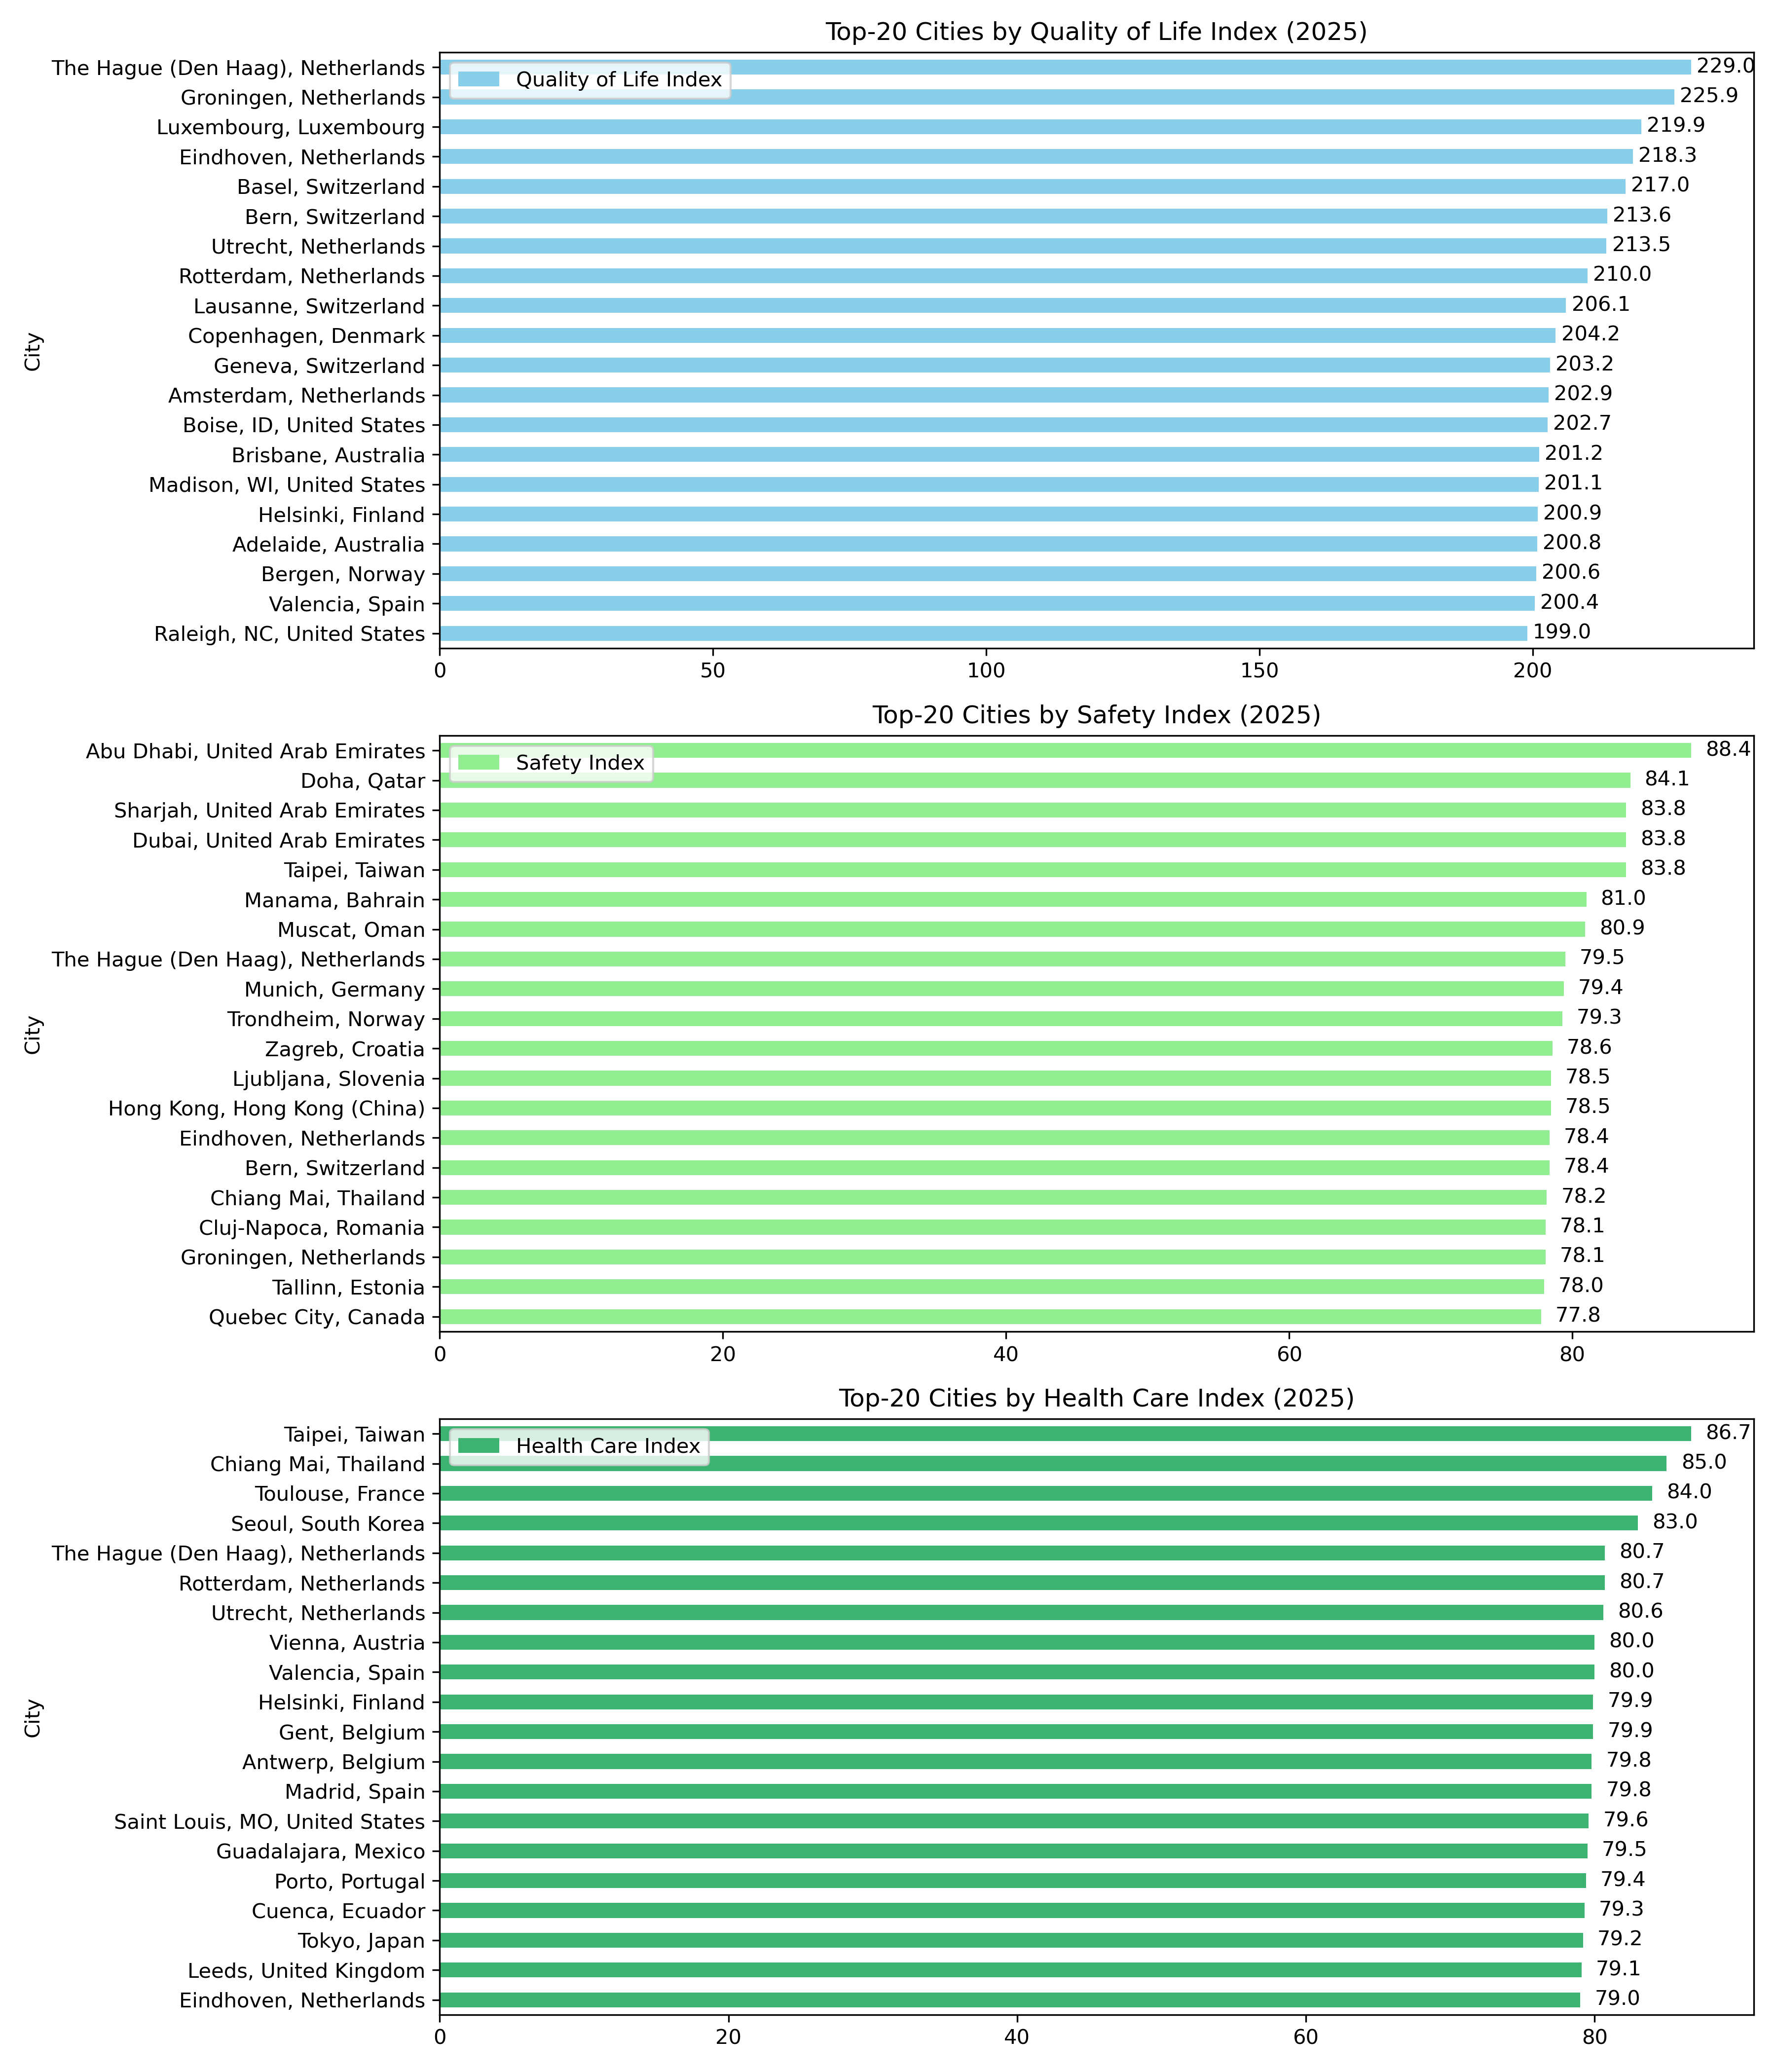

In [18]:
# Import the function for displaying images in Jupyter
from IPython.display import Image

# Display the saved PNG chart
Image(filename="images/top_20_indexes_2025.png")

Let's verify that the image `top_20_indexes_2025.svg` was saved correctly and contains the expected visualization of the Top 20 cities.


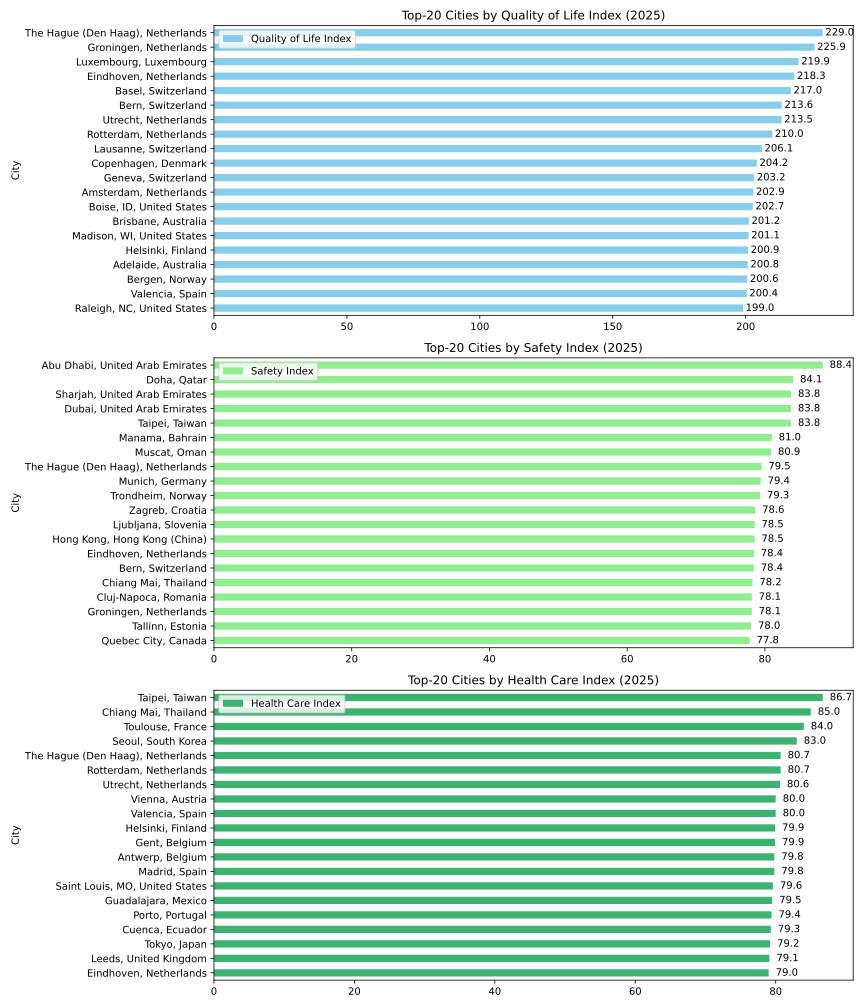

In [19]:
# Import the function for displaying SVG images in Jupyter
from IPython.display import SVG

# Display the saved SVG chart
SVG(filename="images/top_20_indexes_2025.svg")

# Conclusions

As a result of the analysis, the top cities were identified based on the following indexes:

---

### 🏙️ **Quality of Life**  
**Top performers** — cities from the Netherlands, Switzerland, and Luxembourg:

- 🥇 **The Hague (Den Haag), Netherlands** — 229.0  
- 🥈 **Groningen, Netherlands** — 225.9  
- 🥉 **Luxembourg, Luxembourg** — 219.9  

Among the Top 20 cities, **8 are from the Netherlands**, and 3 are from Switzerland. The list also includes cities from Denmark, the USA, Australia, Finland, Norway, and Spain — confirming the high quality of life in Northern and Western Europe.

---

### 🛡️ **Safety**  
**Undisputed leaders** — cities in the Middle East:

- 🥇 **Abu Dhabi, UAE** — 88.1  
- 🥈 **Doha, Qatar** — 84.1  
- 🥉 **Sharjah & Dubai, UAE** — 83.8  

The Top 20 also includes cities in Asia (Taipei, Hong Kong, Muscat) and Europe: Munich, Groningen, Tallinn, Lucerne.  
**Interestingly**, high safety levels don’t always align with high quality of life — for example, Abu Dhabi and Doha are absent from the quality of life ranking.

---

### 🏥 **Healthcare**  
**Best healthcare systems** — found in Taiwan, France, South Korea, and the Netherlands:

- 🥇 **Taipei, Taiwan** — 86.0  
- 🥈 **The Hague (Den Haag), Netherlands** — 84.0  
- 🥉 **Toulouse, France / Seoul, South Korea** — 83.0  

The Top 20 includes major cities with significant healthcare investment: Vienna, Madrid, Ghent, Helsinki, Porto.

---

### 📌 Overall Summary:

The analysis revealed that:
- ***The Netherlands*** is a consistent leader, with its cities ranking highly across all major indexes.
- ***The Hague (Netherlands)*** ranks in the Top-3 both for Quality of Life and Health Care — highlighting its strong overall appeal and balance.
- ***Switzerland and Finland*** demonstrate high quality of life alongside strong healthcare systems.
- ***Middle Eastern cities (UAE, Qatar)*** dominate the safety index but are not top-ranked in overall quality of life.
- ***Taiwan and South Korea*** stand out in healthcare performance.

💡  A high quality of life doesn’t always go hand in hand with safety — some cities rank high in one index but are absent from others.
This highlights that quality of life is a multidimensional concept, and even strong performance in one area (e.g. safety or healthcare) doesn’t guarantee overall comfort or well-being.


# 📝 Final Summary

In this mini-project, I:
- manually saved an HTML page from the website,
- parsed the table using BeautifulSoup,
- transformed the data into a pandas DataFrame,
- visualized the top cities by key indexes: Quality of Life, Safety, and Healthcare,
- saved the final table in CSV format, and the plots in PNG and SVG formats.

🔹 This project served as excellent hands-on practice in web scraping, working with HTML structure, data analysis, and data visualization using Python.
